In [20]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset
df = pd.read_csv('/Users/lucasmazza/Desktop/AusElectData/AusElectrical.ipynb/electricity-normalized.csv')  # Replace with the actual filename or URL

In [8]:
#check the distibution of UP and down 
UP = df[df['class'] == "UP"]
print(len(UP))

DOWN = df[df['class'] == "DOWN"]
print(len(UP))

#perfect disitribution of labels 

19237
19237


In [9]:

## Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical column
df['class']= label_encoder.fit_transform(df['class'])

<Axes: >

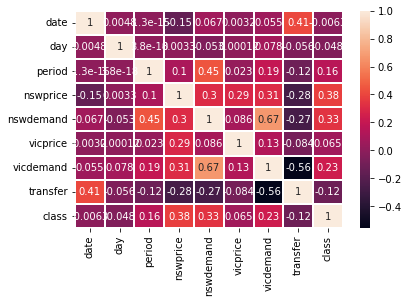

In [12]:
#check correlation of variables
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.1)

In [13]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define the XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
# Predict the labels for the test set
y_pred = model.predict(X_test)


In [16]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.914156460333223


In [18]:
importance = model.get_booster().get_score(importance_type='weight')
feature_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

for feature, score in feature_importance:
    print(f'{feature}: {score}')



date: 1469.0
nswprice: 798.0
period: 434.0
nswdemand: 389.0
day: 354.0
vicdemand: 274.0
transfer: 254.0
vicprice: 206.0


In [21]:
from sklearn.metrics import mean_squared_error


# Assuming you have the actual labels (y_test) and the predictions
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.2929906818770471


In [19]:
# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Cross-Validation Results:')
print('Average Accuracy:', cv_results.mean())
print('Standard Deviation:', cv_results.std())

Cross-Validation Results:
Average Accuracy: 0.9124514406657263
Standard Deviation: 0.002571726633451874


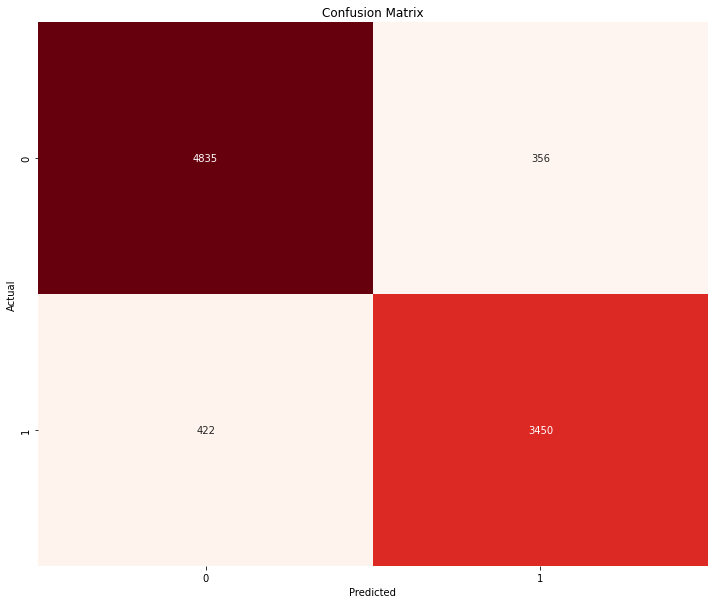

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

F1 score:  0.8986715290440218


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      5191
           1       0.78      0.58      0.67      3872

    accuracy                           0.75      9063
   macro avg       0.76      0.73      0.73      9063
weighted avg       0.76      0.75      0.74      9063



/Users/lucasmazza/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9062120710581485


/Users/lucasmazza/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [52]:
params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'accuracy',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}


In [67]:
import pandas as pd
import xgboost as xgb

# Assuming you have a DataFrame called 'data' containing the training data
# Create the DMatrix for training
dtrain = xgb.DMatrix(data=df[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']], label=df['class'])
dtest = xgb.DMatrix(data=X_test[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']], label=y_test)
# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1
}

num_rounds = 100

# Train the model
# Train the model with evaluation on the test data
xgb_model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, 'Test')])

rf_predictions = rf.predict(X_test)
xgb_predictions = xgb_model.predict(dtest)

ensemble_predictions = (rf_predictions + xgb_predictions) / 2  # Average the predictions




[0]	Test-logloss:0.66029
[1]	Test-logloss:0.63321
[2]	Test-logloss:0.61087
[3]	Test-logloss:0.59260
[4]	Test-logloss:0.57616
[5]	Test-logloss:0.56267
[6]	Test-logloss:0.54919
[7]	Test-logloss:0.53886
[8]	Test-logloss:0.52993
[9]	Test-logloss:0.52080
[10]	Test-logloss:0.51297
[11]	Test-logloss:0.50682
[12]	Test-logloss:0.50052
[13]	Test-logloss:0.49486
[14]	Test-logloss:0.49037
[15]	Test-logloss:0.48569
[16]	Test-logloss:0.48153
[17]	Test-logloss:0.47738
[18]	Test-logloss:0.47392
[19]	Test-logloss:0.47100
[20]	Test-logloss:0.46816
[21]	Test-logloss:0.46556
[22]	Test-logloss:0.46333
[23]	Test-logloss:0.46118
[24]	Test-logloss:0.45938
[25]	Test-logloss:0.45715
[26]	Test-logloss:0.45491
[27]	Test-logloss:0.45262
[28]	Test-logloss:0.44907
[29]	Test-logloss:0.44568
[30]	Test-logloss:0.44380
[31]	Test-logloss:0.44065
[32]	Test-logloss:0.43734
[33]	Test-logloss:0.43422
[34]	Test-logloss:0.43266
[35]	Test-logloss:0.43145
[36]	Test-logloss:0.43031
[37]	Test-logloss:0.42869
[38]	Test-logloss:0.42

/Users/lucasmazza/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [68]:
# Convert ensemble_predictions to binary labels
ensemble_predictions_binary = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Calculate the accuracy score
accuracy = accuracy_score(y_test, ensemble_predictions_binary)

print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.9062120710581485


TypeError: ('invalid cache item: ndarray', [array(<xgboost.core.DMatrix object at 0x143adcdc0>, dtype=object)])